## Pré-processamento de dados  - Breast Cancer dataset

* https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Métricas
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)
from sklearn.metrics import classification_report

# Seleção de características
from sklearn.feature_selection import (SequentialFeatureSelector,
                                       RFE)

In [2]:
##### Bibliotecas externas

# Plotar o diagram de Venn
!pip install venn

  Preparing metadata (setup.py) ... done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19699 sha256=5ce4c96da5d307ff4d943472c0a43fcca001331742c0a1e1cadb7d6e526b6b7d
  Stored in directory: /root/.cache/pip/wheels/9c/ce/43/705b4a04cd822891d1d7a4c43fc444b4798978e72c79528c5f
Successfully built venn


### Carrega a base

In [3]:
def carregaBaseDados(nome):
  return pd.read_csv(nome)

### Pré-processamento

In [4]:
def preProcessamento(dataframe):
  # Remove sample_id e Unnamed: 32
  dataframe.drop(['id'], axis=1, inplace=True)
  dataframe.drop(['Unnamed: 32'], axis=1, inplace=True)

  # Obtém nome das colunas numéricas
  scaler_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns
  # Aplica normalização
  scaler = StandardScaler()
  ajuste = scaler.fit(dataframe[scaler_cols])
  dataframe[scaler_cols] = ajuste.transform(dataframe[scaler_cols])

  # Transforma os dados categóricos de diagnosis
  labelencoder = LabelEncoder()
  dataframe['diagnosis'] = labelencoder.fit_transform(dataframe['diagnosis'])

### Separação entre treino e teste

In [5]:
# Separa atributos da classe (X,y)
def separaClasse(dataframe):
  X = dataframe.drop(['diagnosis'], axis = 1)
  y = dataframe['diagnosis']
  return X,y

In [6]:
# Separa os conjuntos em treino e teste (70%/30%)
def separaTreinoTeste(X, y):
  return train_test_split(X,y, test_size=0.3)

### Modelo preditivo

In [7]:
# Gera o modelo preditivo
def geraModelo(modelo, X,y):
  # modelo = 'DecisionTreeClassifier()'
  modelo = eval(modelo)
  modelo.fit(X,y)
  return modelo

### Métricas

In [8]:
def geraMetricas(y_test, y_pred):
  # Acuracidade
  print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
  #Revocação
  print("Recall :%.2f" %(recall_score(y_test,y_pred)))
  #Precisão
  print("Precision :%.2f" %(precision_score(y_test,y_pred)))
  #F1-score
  print("F1-score :%.2f" %(f1_score(y_test,y_pred)))


In [9]:
def metricaReport(y_test, y_pred):
  print(classification_report(y_test, y_pred))

## Seleção de Características

In [10]:
def geraMapaCalor(dataframe):
  plt.figure(figsize = (15, 10))
  sns.heatmap(dataframe.corr(), cmap = 'Blues')
  plt.title("Correlações entre os atributos", size = 20)
  plt.show()

In [25]:
# Sequential feature selection
def featureSelectionSFS(clf, direction, total_features, X, y):
  sfs = SequentialFeatureSelector(estimator = eval(clf),
                                   n_features_to_select = total_features,
                                   direction = direction,
                                   scoring = 'accuracy')
  sfs.fit(X,y)
  return sfs

In [12]:
# Recursive Feature Elimination
def featureSelectionRFE(clf, total_features, X, y):
  rfe = RFE(estimator = eval(clf),
            n_features_to_select=total_features)
  rfe.fit(X,y)
  return rfe

In [13]:
# Verifica os nomes das colunas selecionadas
def getFeaturesName(selBestModel):
  return selBestModel.get_feature_names_out().tolist()

In [14]:
# Aplica a transformação (Redução) no conjunto Treino e Teste
def changeData(selBestModel, X):
  return selBestModel.transform(X)


### Realizando testes com os dados:

In [15]:
# Gera o dataframe
df = carregaBaseDados('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
# Aplica pré-processamento
preProcessamento(df)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

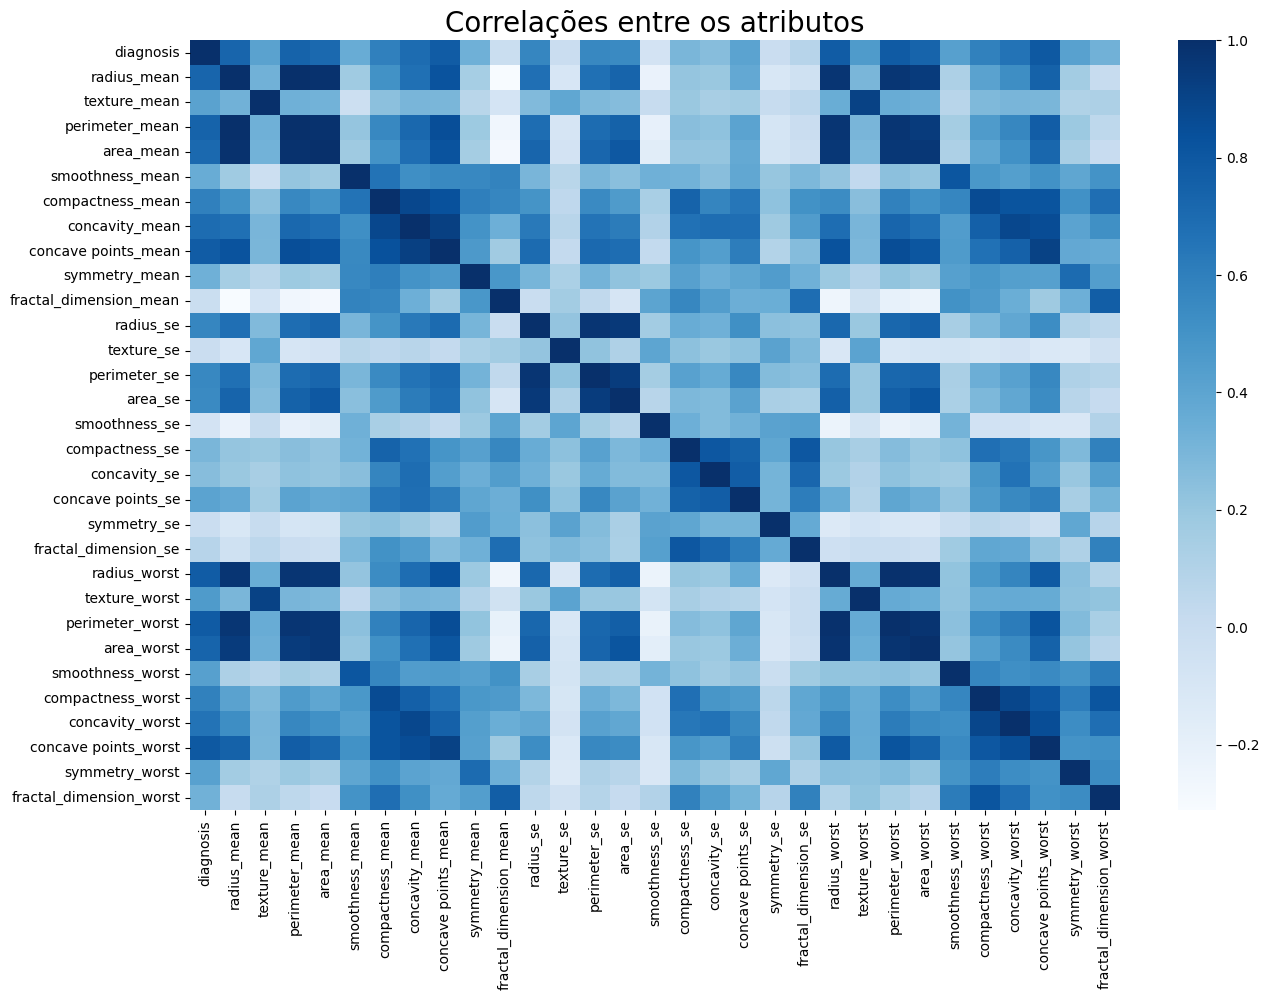

In [19]:
# Avalia as correlações entre os atributos
geraMapaCalor(df)

In [20]:
# Separa atributos e classe
X,y = separaClasse(df)

In [21]:
# Gerar conjunto treino e teste
X_train, X_test, y_train, y_test = separaTreinoTeste(X, y)

In [22]:
# Avalia os dados
modelo  = geraModelo('DecisionTreeClassifier()', X_train, y_train)
score = modelo.score(X_test, y_test)
y_pred = modelo.predict(X_test)
print(score)

0.8538011695906432


In [23]:
# Avalia o modelo com mais métricas
geraMetricas(y_test, y_pred)

ACC: 0.854
Recall :0.79
Precision :0.85
F1-score :0.82


Direção Forward

In [26]:
# Step forward feature selection
stepForward = featureSelectionSFS('DecisionTreeClassifier()', 'forward', 9, X_train, y_train)

In [27]:
# Armazena o nome das características selecionadas
features_Forward = getFeaturesName(stepForward)
features_Forward

['radius_mean',
 'perimeter_mean',
 'symmetry_mean',
 'radius_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [29]:
# Transforma a base de dados apenas com as melhores características
New_X_train = changeData(stepForward, X_train)
New_X_test = changeData(stepForward, X_test)

In [30]:
# Re-treinar o classificador com a base reduzida
modelo  = geraModelo('DecisionTreeClassifier()', New_X_train, y_train)
score = modelo.score(New_X_test, y_test)
y_pred = modelo.predict(New_X_test)
print(score)

0.9064327485380117


In [31]:
geraMetricas(y_test, y_pred)

ACC: 0.906
Recall :0.87
Precision :0.90
F1-score :0.89


Direção Backward

In [32]:
# Step backward feature selection
stepBackward = featureSelectionSFS('DecisionTreeClassifier()', 'backward', 9, X_train, y_train)

In [33]:
# Armazena o nome das características selecionadas
features_Backward = getFeaturesName(stepBackward)
features_Backward

['texture_mean',
 'compactness_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_worst',
 'texture_worst',
 'smoothness_worst',
 'compactness_worst',
 'fractal_dimension_worst']

In [35]:
# Transforma a base de dados apenas com as melhores características
New_X_train = changeData(stepBackward, X_train)
New_X_test = changeData(stepBackward, X_test)

In [36]:
# Re-treinar o classificador com a base reduzida
modelo  = geraModelo('DecisionTreeClassifier()', New_X_train, y_train)
score = modelo.score(New_X_test, y_test)
y_pred = modelo.predict(New_X_test)
print(score)

0.9298245614035088


In [37]:
geraMetricas(y_test, y_pred)

ACC: 0.930
Recall :0.92
Precision :0.92
F1-score :0.92


RFE

In [39]:
# #RFE
rfe = featureSelectionRFE('DecisionTreeClassifier()', 9, X_train, y_train)

In [40]:
# Armazena o nome das características selecionadas
features_RFE = getFeaturesName(rfe)
features_RFE

['texture_mean',
 'symmetry_mean',
 'radius_se',
 'compactness_se',
 'radius_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [41]:
# Transforma a base de dados apenas com as melhores características
New_X_train = changeData(rfe, X_train)
New_X_test = changeData(rfe, X_test)

In [42]:
# Re-treinar o classificador com a base reduzida
modelo  = geraModelo('DecisionTreeClassifier()', New_X_train, y_train)
score = modelo.score(New_X_test, y_test)
y_pred = modelo.predict(New_X_test)
print(score)

0.9064327485380117


In [43]:
geraMetricas(y_test, y_pred)

ACC: 0.906
Recall :0.89
Precision :0.89
F1-score :0.89


#### Similaridade das Features

In [44]:
# Diagrama de Venn
from venn import venn

In [45]:
features = {
    "Step Forward": set(features_Forward),
    "Step Backward": set(features_Backward),
    "RFE": set(features_RFE),
}

In [46]:
features

{'Step Forward': {'area_se',
  'fractal_dimension_worst',
  'perimeter_mean',
  'perimeter_worst',
  'radius_mean',
  'radius_se',
  'radius_worst',
  'symmetry_mean',
  'symmetry_worst'},
 'Step Backward': {'compactness_mean',
  'compactness_worst',
  'concave points_mean',
  'fractal_dimension_worst',
  'radius_worst',
  'smoothness_worst',
  'symmetry_mean',
  'texture_mean',
  'texture_worst'},
 'RFE': {'area_worst',
  'compactness_se',
  'compactness_worst',
  'concave points_worst',
  'concavity_worst',
  'radius_se',
  'radius_worst',
  'symmetry_mean',
  'texture_mean'}}

<Axes: >

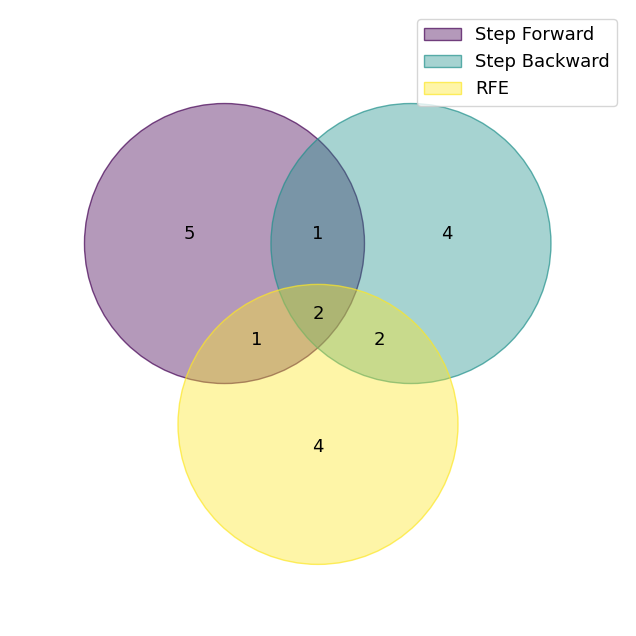

In [47]:
venn(features)

In [48]:
set(features_Forward).intersection(features_Backward, features_RFE)

{'radius_worst', 'symmetry_mean'}

In [52]:
set(features_Forward).difference(features_Backward, features_RFE)

{'area_se',
 'perimeter_mean',
 'perimeter_worst',
 'radius_mean',
 'symmetry_worst'}

In [54]:
set(features_RFE).difference(features_Forward, features_Backward)

{'area_worst', 'compactness_se', 'concave points_worst', 'concavity_worst'}

In [55]:
set(features_Forward).intersection(features_RFE)

{'radius_se', 'radius_worst', 'symmetry_mean'}

In [56]:
set(features_Forward).intersection(features_Backward)

{'fractal_dimension_worst', 'radius_worst', 'symmetry_mean'}